In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, fbeta_score, precision_recall_curve, roc_auc_score, roc_curve

In [4]:
# Loading input CSV file
df = pd.read_csv("../../data/census_epa_theil_cleaned.csv")
df.columns

Index(['ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION',
       'AREALAND', 'pop_tot', 'pop_white_only', 'pop_black', 'pop_asian',
       'pop_hispanic_latino_any', 'industry_tot', 'industry_ag_for',
       'industry_const', 'industry_manu', 'industry_transp', 'pop_density',
       'poverty_pct', 'income_median', 'health_ins_tot', 'health_ins_yes',
       'health_ins_no', 'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT',
       'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only',
       'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
       'prim_ind_share', 'sec_ind_share', 'health_ins_pct',
       'theil_income_median'],
      dtype='object')

In [5]:
# Choosing required variables
df = df[['pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
        'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct',
        'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80151 entries, 0 to 80150
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pct_pop_white_only           80151 non-null  float64
 1   pct_pop_black                80151 non-null  float64
 2   pct_pop_asian                80151 non-null  float64
 3   pct_pop_hispanic_latino_any  80151 non-null  float64
 4   pop_density                  80151 non-null  float64
 5   prim_ind_share               80151 non-null  float64
 6   sec_ind_share                80151 non-null  float64
 7   poverty_pct                  80151 non-null  float64
 8   theil_income_median          80151 non-null  float64
 9   health_ins_pct               80151 non-null  float64
 10  PM25                         80151 non-null  float64
 11  OZONE                        80151 non-null  float64
 12  DSLPM                        80151 non-null  float64
 13  PTRAF           

In [6]:
df.head()

,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,83.863763,11.111111,2.400893,1.563372,182.284436,0.111669,4.969291,15.4,3.244928e-06,90.954774,9.693224,59.94949,0.161449,12.358415,0.289474,0.066498,0.077498,0.062147,0.330720,0.086036
1,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585,9.722213,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622
2,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780,9.743874,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432
3,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866,9.766758,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062
4,75.850262,22.939968,0.639123,2.168455,706.196703,0.000000,3.865074,18.0,2.502762e-06,96.439447,9.781263,59.92819,0.261567,73.784886,0.005914,0.106715,0.103047,0.100418,3.004055,0.017290


In [7]:
# clssifying PM25 with >9 as 1 else 0
df['PM25'] = np.where(df['PM25'] > 9, 1, 0)
df.head()

,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,83.863763,11.111111,2.400893,1.563372,182.284436,0.111669,4.969291,15.4,3.244928e-06,90.954774,1,59.94949,0.161449,12.358415,0.289474,0.066498,0.077498,0.062147,0.330720,0.086036
1,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585,1,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622
2,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780,1,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432
3,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866,1,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062
4,75.850262,22.939968,0.639123,2.168455,706.196703,0.000000,3.865074,18.0,2.502762e-06,96.439447,1,59.92819,0.261567,73.784886,0.005914,0.106715,0.103047,0.100418,3.004055,0.017290


In [8]:
# urban cutoff
urbal_df = df[df['pop_density'] > 500]
urbal_df.shape

(48660, 20)

In [9]:
# split dependent and independent variables
X = urbal_df.drop(['PM25'], axis=1)
y = urbal_df['PM25']

In [10]:
X.shape, y.shape

((48660, 19), (48660,))

In [11]:
y.value_counts()

PM25
0    32194
1    16466
Name: count, dtype: int64

### Split the data into training and test sets

In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=201, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=201, stratify=y_train_val)

In [13]:
print("Size of train input : " + str(X_train.shape))
print("Size of validation input : " + str(X_val.shape))
print("Size of test input : " + str(X_test.shape))
print("Length of train output : " + str(len(y_train)))
print("Length of validation output : " + str(len(y_val)))
print("Length of test output : " + str(len(y_test)))

Size of train input : (33088, 19)
Size of validation input : (5840, 19)
Size of test input : (9732, 19)
Length of train output : 33088
Length of validation output : 5840
Length of test output : 9732


In [14]:
# use min max scaling for input data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_val = scaler.transform(X_train_val)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Create the AdaBoost classification model

In [15]:
# model is trained on training dataset
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50, algorithm='SAMME.R', learning_rate=0.5, random_state=201)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, random_state=201)

In [16]:
# feature importanace score
for name, score in zip(X.columns, ada_clf.feature_importances_):
    print(name, score)

pct_pop_white_only 0.02611622638163242
pct_pop_black 0.03301876150862184
pct_pop_asian 0.05074512741105563
pct_pop_hispanic_latino_any 0.08112117913821855
pop_density 0.036648148007061815
prim_ind_share 0.02386693588740487
sec_ind_share 0.037557946589461606
poverty_pct 0.007217749717494671
theil_income_median 0.010370425020628455
health_ins_pct 0.048075233417660374
OZONE 0.1813762275592457
DSLPM 0.10141712100545412
PTRAF 0.018955344221120028
PRE1960PCT 0.017884366899311215
PNPL 0.09847500135118845
PRMP 0.09548036942682092
PTSDF 0.08588932987891494
UST 0.026514091426011525
PWDIS 0.019270415152692816


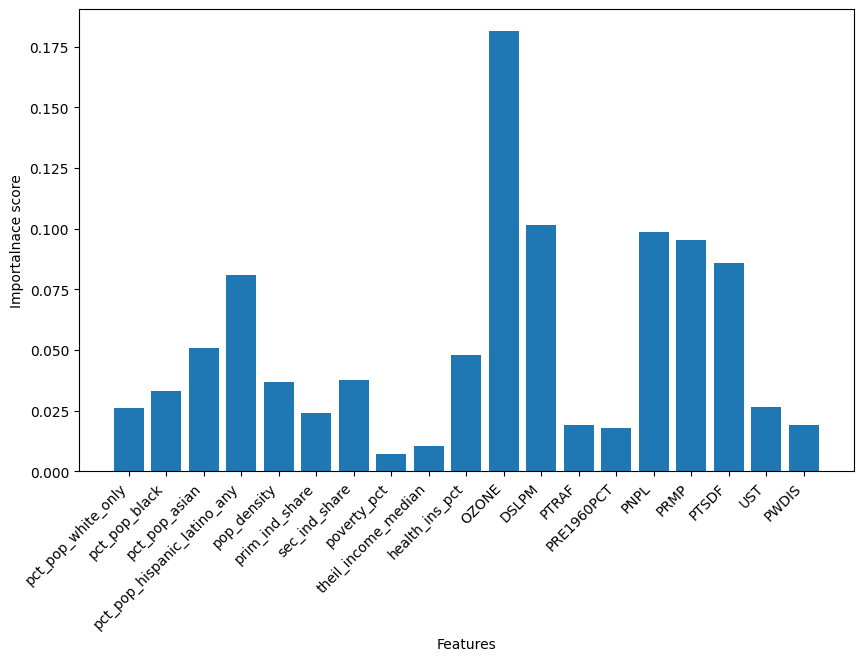

In [17]:
# plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, ada_clf.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importalnace score")
plt.xticks(rotation=45, ha='right')
plt.show()

looks like ozone has highest impact on PM25

### Make predictions

In [19]:
# Validation input dataset is used for prediction
y_pred = ada_clf.predict(X_val)
y_pred.shape

(5840,)

### Evaluate the model

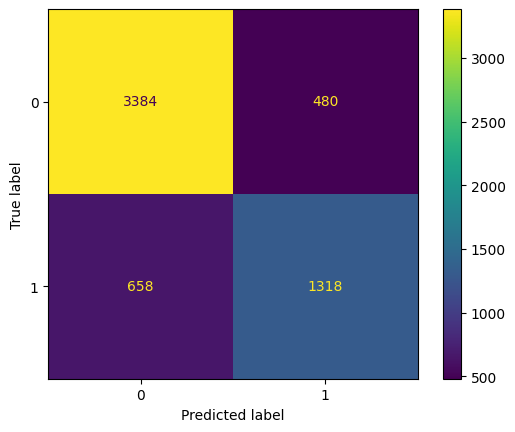

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
print('Accuracy score', accuracy_score(y_val, y_pred))

Accuracy score 0.8051369863013699


In [22]:
target_names = ['Low Risk', 'High Risk']
print("Classification Report : \n")
print(classification_report(y_val, y_pred, target_names=target_names))

Classification Report : 

              precision    recall  f1-score   support

    Low Risk       0.84      0.88      0.86      3864
   High Risk       0.73      0.67      0.70      1976

    accuracy                           0.81      5840
   macro avg       0.79      0.77      0.78      5840
weighted avg       0.80      0.81      0.80      5840



In [23]:
# comparing evalution metric with maseline model
high_pct = y_val.sum()/len(y_val)

print("precision: " + str(precision_score(y_val, y_pred)) + " | baseline: " + str(high_pct))
print("recall: " + str(recall_score(y_val, y_pred)) + " | baseline: " + str(1))
print("f1 score: " + str(fbeta_score(y_val, y_pred, beta=1)) + " | baseline: " + str(2*high_pct/(high_pct+1)))
print("f2 score: " + str(fbeta_score(y_val, y_pred, beta=2)) + " | baseline: " + str(5*high_pct/(4*high_pct+1)))

precision: 0.7330367074527252 | baseline: 0.33835616438356164
recall: 0.667004048582996 | baseline: 1
f1 score: 0.6984631690514043 | baseline: 0.5056294779938588
f2 score: 0.6792413935271078 | baseline: 0.7188591385331781


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


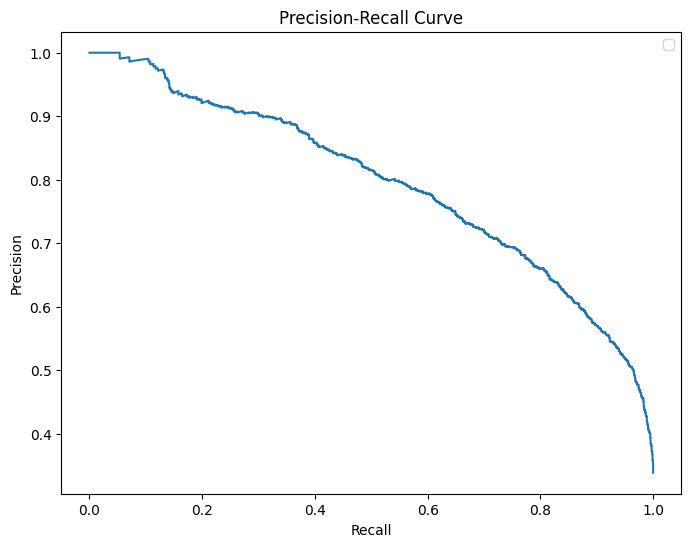

In [24]:
# Plotting Precision-Recall curve
y_prob = ada_clf.predict_proba(X_val)[:,1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

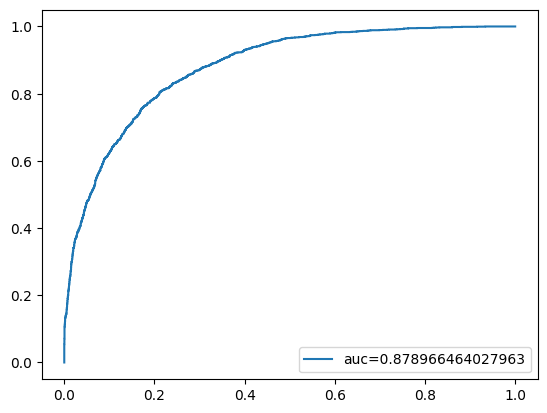

In [25]:
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity.

fpr, tpr, _ = roc_curve(y_val,  y_prob)
auc = roc_auc_score(y_val, y_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

# The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.
# The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

### Tune the AdaBoost hyperparameters

In [26]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 2,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.5,
 'n_estimators': 50,
 'random_state': 201}

In [27]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(5)

In [28]:
# Define the scoring metrics
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f2': make_scorer(fbeta_score, beta=2)}

In [29]:
# Using Grid search CV to find best parameters
# First let's tune max_depth

gs_param_grid = [{
    'estimator__max_depth': np.arange(1, 10)
}]

grid_search = GridSearchCV(ada_clf, gs_param_grid, scoring=scoring, refit='f2', cv=kfolds, verbose=1, n_jobs=5)
grid_search.fit(X_train, y_train)

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Best parameters :  {'estimator__max_depth': 6}
Best score :  0.7758691436529166


Best max_depth estimated is 6

In [30]:
# Let's try to tune with n_estimator values and max_depth > 6
gs_param_grid = [{
    'estimator__max_depth': [6,11,12,15],
    'n_estimators' : [30, 50, 70, 90]
}]

grid_search = GridSearchCV(ada_clf, gs_param_grid, scoring=scoring, refit='f2', cv=kfolds, n_jobs= 5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters :  {'estimator__max_depth': 6, 'n_estimators': 50}
Best score :  0.7758691436529166


Still best max_depth is 6 and n_estimator is 50

In [31]:
# Trying to compare different values for ma_depth, n_estimator and learning_rate
gs_param_grid = [{
    'estimator__max_depth': [6,8,10],
    'n_estimators' : [70, 90, 120],
    'learning_rate': [0.1, 0.5, 1.0]
}]

grid_search = GridSearchCV(ada_clf, gs_param_grid, scoring=scoring, refit='f2', cv=kfolds, n_jobs= 5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters :  {'estimator__max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 120}
Best score :  0.7747996266263528


In [32]:
# get the best model based on all of the above hyperparameter tuning
# predict the best model on validation set
# get the metrics score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Best precision : " +str(precision_score(y_val,y_pred)))
print("Best recall : " +str(recall_score(y_val,y_pred)))
print("Best f2 score : " +str(fbeta_score(y_val,y_pred, beta=2)))

Best precision : 0.8408966648441771
Best recall : 0.77834008097166
Best f2 score : 0.7900955512175075


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


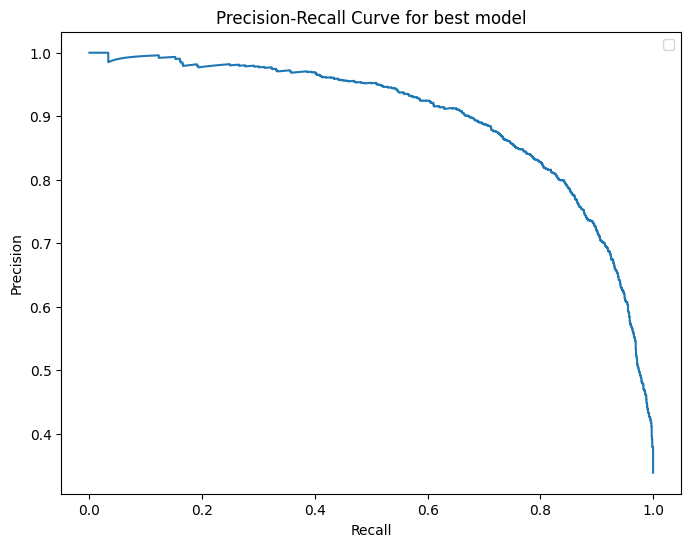

In [33]:
# precision-recall curve on best ada boost model
y_prob = best_model.predict_proba(X_val)[:,1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for best model')
plt.legend(loc='best')
plt.show()

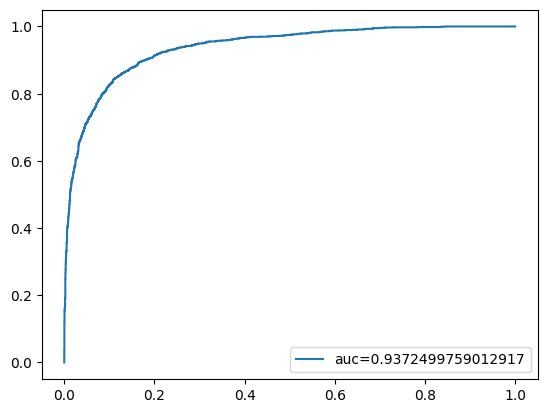

In [34]:
fpr, tpr, _ = roc_curve(y_val,  y_prob)
auc = roc_auc_score(y_val, y_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

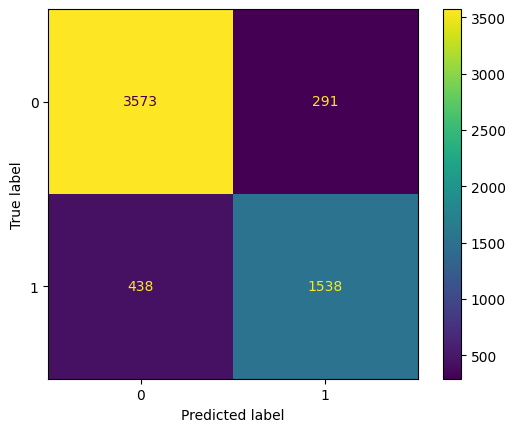

In [35]:
# confusion matrics for best adaboost model
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

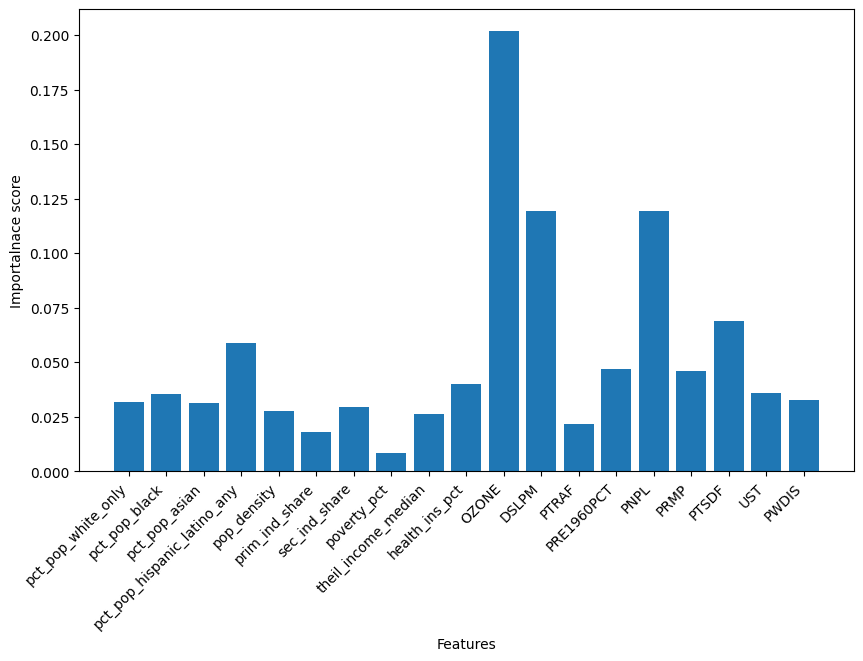

In [36]:
# feature importance plot for best model
plt.figure(figsize=(10, 6))
plt.bar(X.columns, best_model.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importalnace score")
plt.xticks(rotation=45, ha='right')
plt.show()